In [134]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score,recall_score,precision_score,f1_score

from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

In [92]:
df = pd.read_csv('data01.csv')
df.head()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   ID                        1177 non-null   int64  
 2   outcome                   1176 non-null   float64
 3   age                       1177 non-null   int64  
 4   gendera                   1177 non-null   int64  
 5   BMI                       962 non-null    float64
 6   hypertensive              1177 non-null   int64  
 7   atrialfibrillation        1177 non-null   int64  
 8   CHD with no MI            1177 non-null   int64  
 9   diabetes                  1177 non-null   int64  
 10  deficiencyanemias         1177 non-null   int64  
 11  depression                1177 non-null   int64  
 12  Hyperlipemia              1177 non-null   int64  
 13  Renal failure             1177 non-null   int64  
 14  COPD    

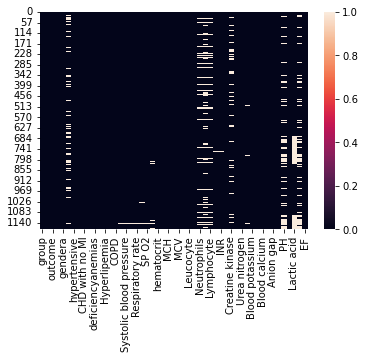

In [94]:
sns.heatmap(df.isnull())
plt.show()

In [95]:
df[df['outcome'].isnull()]

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
1159,2,162338,NaN,83,1,NaN,1,0,0,1,...,130.666667,7.45,92.625,15.5,1.983333,NaN,26.5,NaN,NaN,55


In [96]:
df.drop(1159,inplace=True)

In [97]:
df_full = df.fillna(df.mean())
df_full

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230000,21.166667,0.500000,40.000000,55
1,1,139812,0.0,75,2,30.188278,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225000,33.444444,0.500000,78.000000,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268000,30.571429,0.500000,71.500000,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370000,38.571429,0.600000,75.000000,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250000,22.000000,0.600000,50.000000,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,2,171130,0.0,62,1,25.516870,1,1,0,1,...,136.714286,10.271429,94.428571,20.142857,2.714286,7.378532,27.714286,1.853426,45.535382,40
1173,2,101659,0.0,78,1,25.822710,0,1,0,1,...,135.680000,10.523529,101.720000,18.160000,2.012500,7.378532,20.480000,1.853426,45.535382,30
1174,2,162069,0.0,85,2,23.891779,1,1,0,1,...,136.000000,8.466667,97.285714,14.000000,2.028571,7.378532,28.857143,1.853426,45.535382,55
1175,2,120967,0.0,79,2,35.288554,0,0,1,1,...,140.000000,8.183333,104.000000,15.750000,2.090000,7.378532,24.375000,1.853426,45.535382,25


In [98]:
features = df_full.drop('outcome',axis=1)
target = df_full['outcome']

In [99]:
X_train,X_test, y_train,y_test = train_test_split(features,target,test_size=0.2)

In [100]:
scaller = MinMaxScaler(feature_range=(0,1))
X_train_scalled = pd.DataFrame(data=scaller.fit_transform(X_train),columns=X_train.columns)
X_test_scalled = pd.DataFrame(data=scaller.transform(X_test),columns=X_test.columns)

In [101]:
X_test_scalled

,group,ID,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1.0,0.660354,0.7375,0.0,0.068038,1.0,0.0,0.0,1.0,1.0,...,0.543766,0.958289,0.450242,0.288060,0.273649,0.755102,0.437659,0.172778,0.218855,0.583333
1,0.0,0.283751,0.7875,1.0,0.183812,1.0,0.0,0.0,0.0,1.0,...,0.726603,0.267873,0.608557,0.332196,0.240125,0.536443,0.442422,0.207447,0.423120,1.000000
2,0.0,0.035493,0.8500,1.0,0.238499,1.0,0.0,0.0,1.0,0.0,...,0.568474,0.545882,0.573911,0.408955,0.398649,0.588841,0.290714,0.025532,0.360746,0.666667
3,1.0,0.824983,0.7000,1.0,0.153592,0.0,0.0,0.0,0.0,1.0,...,0.584646,0.248739,0.613456,0.151045,0.217445,0.802721,0.377646,0.236170,0.218855,0.666667
4,0.0,0.101605,0.4500,1.0,0.183812,0.0,0.0,0.0,0.0,0.0,...,0.637343,0.380392,0.689398,0.247761,0.403153,0.516327,0.295653,0.216223,0.268013,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,0.0,0.138662,0.8750,1.0,0.183812,0.0,0.0,0.0,0.0,0.0,...,0.517477,0.596078,0.376811,0.349851,0.277027,0.588841,0.469517,0.140426,0.360746,0.666667
232,0.0,0.451067,0.7375,0.0,0.183812,1.0,1.0,0.0,0.0,0.0,...,0.750090,0.472727,0.789261,0.691835,0.541769,0.475219,0.083728,0.505728,0.157928,0.666667
233,1.0,0.851893,0.4875,1.0,0.183812,0.0,0.0,0.0,0.0,1.0,...,0.658933,0.347059,0.576854,0.407375,0.555644,0.744898,0.356378,0.178723,0.276094,0.666667
234,1.0,0.528760,0.8500,1.0,0.183812,1.0,1.0,0.0,0.0,1.0,...,0.569709,0.381513,0.413190,0.489552,0.194015,0.311224,0.415432,0.553191,0.322110,0.666667


In [102]:
X_test_scalled

,group,ID,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1.0,0.660354,0.7375,0.0,0.068038,1.0,0.0,0.0,1.0,1.0,...,0.543766,0.958289,0.450242,0.288060,0.273649,0.755102,0.437659,0.172778,0.218855,0.583333
1,0.0,0.283751,0.7875,1.0,0.183812,1.0,0.0,0.0,0.0,1.0,...,0.726603,0.267873,0.608557,0.332196,0.240125,0.536443,0.442422,0.207447,0.423120,1.000000
2,0.0,0.035493,0.8500,1.0,0.238499,1.0,0.0,0.0,1.0,0.0,...,0.568474,0.545882,0.573911,0.408955,0.398649,0.588841,0.290714,0.025532,0.360746,0.666667
3,1.0,0.824983,0.7000,1.0,0.153592,0.0,0.0,0.0,0.0,1.0,...,0.584646,0.248739,0.613456,0.151045,0.217445,0.802721,0.377646,0.236170,0.218855,0.666667
4,0.0,0.101605,0.4500,1.0,0.183812,0.0,0.0,0.0,0.0,0.0,...,0.637343,0.380392,0.689398,0.247761,0.403153,0.516327,0.295653,0.216223,0.268013,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,0.0,0.138662,0.8750,1.0,0.183812,0.0,0.0,0.0,0.0,0.0,...,0.517477,0.596078,0.376811,0.349851,0.277027,0.588841,0.469517,0.140426,0.360746,0.666667
232,0.0,0.451067,0.7375,0.0,0.183812,1.0,1.0,0.0,0.0,0.0,...,0.750090,0.472727,0.789261,0.691835,0.541769,0.475219,0.083728,0.505728,0.157928,0.666667
233,1.0,0.851893,0.4875,1.0,0.183812,0.0,0.0,0.0,0.0,1.0,...,0.658933,0.347059,0.576854,0.407375,0.555644,0.744898,0.356378,0.178723,0.276094,0.666667
234,1.0,0.528760,0.8500,1.0,0.183812,1.0,1.0,0.0,0.0,1.0,...,0.569709,0.381513,0.413190,0.489552,0.194015,0.311224,0.415432,0.553191,0.322110,0.666667


In [103]:
y_train.value_counts()

0.0    810
1.0    130
Name: outcome, dtype: int64

In [104]:
y_test.value_counts()

0.0    207
1.0     29
Name: outcome, dtype: int64

In [105]:
X_train_scalled.drop(['ID','group'],axis=1,inplace=True)
X_test_scalled.drop(['ID','group'],axis=1,inplace=True)

In [106]:
over_sample = SMOTE()
X_TRAIN_BALANCE , Y_TRAIN_BALANCE = over_sample.fit_resample(X_train_scalled,y_train)
X_TEST_BALANCE , Y_TEST_BALANCE = over_sample.fit_resample(X_test_scalled,y_test)

In [107]:
Y_TEST_BALANCE.value_counts()

0.0    207
1.0    207
Name: outcome, dtype: int64

In [108]:
Y_TRAIN_BALANCE.value_counts()

0.0    810
1.0    810
Name: outcome, dtype: int64

In [109]:
classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier(),
    "XGBoost" : XGBClassifier()
}

In [130]:
lg = LogisticRegression()
lg.fit(X_TRAIN_BALANCE, Y_TRAIN_BALANCE)
prediction = lg.predict(X_TEST_BALANCE)
f1=f1_score(Y_TEST_BALANCE,prediction)
acc=accuracy_score(Y_TEST_BALANCE,prediction)
pre=precision_score(Y_TEST_BALANCE,prediction)
rec=recall_score(Y_TEST_BALANCE,prediction)

m1=pd.DataFrame({'F1SCORE':f1,'ACCURACCY':acc,'PRECISION':pre,'RECALL':rec},index=['LogisticRegression'])

In [145]:
svc = SVC()
svc.fit(X_TRAIN_BALANCE, Y_TRAIN_BALANCE)
prediction = svc.predict(X_TEST_BALANCE)
f1=f1_score(Y_TEST_BALANCE,prediction)
acc=accuracy_score(Y_TEST_BALANCE,prediction)
pre=precision_score(Y_TEST_BALANCE,prediction)
rec=recall_score(Y_TEST_BALANCE,prediction)

m7=pd.DataFrame({'F1SCORE':f1,'ACCURACCY':acc,'PRECISION':pre,'RECALL':rec},index=['SVC'])

In [129]:
tree = DecisionTreeClassifier()
tree.fit(X_TRAIN_BALANCE, Y_TRAIN_BALANCE)
prediction = tree.predict(X_TEST_BALANCE)
f1=f1_score(Y_TEST_BALANCE,prediction)
acc=accuracy_score(Y_TEST_BALANCE,prediction)
pre=precision_score(Y_TEST_BALANCE,prediction)
rec=recall_score(Y_TEST_BALANCE,prediction)

m2=pd.DataFrame({'F1SCORE':f1,'ACCURACCY':acc,'PRECISION':pre,'RECALL':rec},index=['DecisionTree'])

In [128]:
forest = RandomForestClassifier()
forest.fit(X_TRAIN_BALANCE, Y_TRAIN_BALANCE)
prediction = forest.predict(X_TEST_BALANCE)
f1=f1_score(Y_TEST_BALANCE,prediction)
acc=accuracy_score(Y_TEST_BALANCE,prediction)
pre=precision_score(Y_TEST_BALANCE,prediction)
rec=recall_score(Y_TEST_BALANCE,prediction)

m3=pd.DataFrame({'F1SCORE':f1,'ACCURACCY':acc,'PRECISION':pre,'RECALL':rec},index=['RandomForest'])

In [127]:
xgb = XGBClassifier()
xgb.fit(X_TRAIN_BALANCE, Y_TRAIN_BALANCE)
prediction = xgb.predict(X_TEST_BALANCE)
f1=f1_score(Y_TEST_BALANCE,prediction)
acc=accuracy_score(Y_TEST_BALANCE,prediction)
pre=precision_score(Y_TEST_BALANCE,prediction)
rec=recall_score(Y_TEST_BALANCE,prediction)

m4=pd.DataFrame({'F1SCORE':f1,'ACCURACCY':acc,'PRECISION':pre,'RECALL':rec},index=['XGB'])

In [126]:
knn = KNeighborsClassifier()
knn.fit(X_TRAIN_BALANCE, Y_TRAIN_BALANCE)
prediction = knn.predict(X_TEST_BALANCE)
f1=f1_score(Y_TEST_BALANCE,prediction)
acc=accuracy_score(Y_TEST_BALANCE,prediction)
pre=precision_score(Y_TEST_BALANCE,prediction)
rec=recall_score(Y_TEST_BALANCE,prediction)

m5=pd.DataFrame({'F1SCORE':f1,'ACCURACCY':acc,'PRECISION':pre,'RECALL':rec},index=['KNeighborsClassifier'])

In [113]:
model = Sequential()
model.add(Dense(10,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='BinaryCrossentropy')

In [114]:
model.fit(X_TRAIN_BALANCE,Y_TRAIN_BALANCE,batch_size=8,epochs=200)

Epoch 1/200
203/203 [==============================] - 1s 1ms/step - loss: 0.6741
Epoch 2/200
203/203 [==============================] - 0s 1ms/step - loss: 0.6350
Epoch 3/200
203/203 [==============================] - 0s 1ms/step - loss: 0.6076
Epoch 4/200
203/203 [==============================] - 0s 1ms/step - loss: 0.5805
Epoch 5/200
203/203 [==============================] - 0s 1ms/step - loss: 0.5283
Epoch 6/200
203/203 [==============================] - 0s 1ms/step - loss: 0.4985
Epoch 7/200
203/203 [==============================] - 0s 1ms/step - loss: 0.4848
Epoch 8/200
203/203 [==============================] - 0s 1ms/step - loss: 0.4751
Epoch 9/200
203/203 [==============================] - 0s 1ms/step - loss: 0.4656
Epoch 10/200
203/203 [==============================] - 0s 1ms/step - loss: 0.4578
Epoch 11/200
203/203 [==============================] - 0s 1ms/step - loss: 0.4533
Epoch 12/200
203/203 [==============================] - 0s 1ms/step - loss: 0.4467
Epoch 13/200


203/203 [==============================] - 0s 1ms/step - loss: 0.1947
Epoch 100/200
203/203 [==============================] - 0s 1ms/step - loss: 0.1895
Epoch 101/200
203/203 [==============================] - 0s 1ms/step - loss: 0.1921
Epoch 102/200
203/203 [==============================] - 0s 1ms/step - loss: 0.1870
Epoch 103/200
203/203 [==============================] - 0s 1ms/step - loss: 0.1860
Epoch 104/200
203/203 [==============================] - 0s 1ms/step - loss: 0.1829
Epoch 105/200
203/203 [==============================] - 0s 1ms/step - loss: 0.1830
Epoch 106/200
203/203 [==============================] - 0s 1ms/step - loss: 0.1838
Epoch 107/200
203/203 [==============================] - 0s 1ms/step - loss: 0.1852
Epoch 108/200
203/203 [==============================] - 0s 1ms/step - loss: 0.1801
Epoch 109/200
203/203 [==============================] - 0s 1ms/step - loss: 0.1787
Epoch 110/200
203/203 [==============================] - 0s 1ms/step - loss: 0.1827
Epoch 

203/203 [==============================] - 0s 1ms/step - loss: 0.1068
Epoch 197/200
203/203 [==============================] - 0s 1ms/step - loss: 0.1095
Epoch 198/200
203/203 [==============================] - 0s 1ms/step - loss: 0.1119
Epoch 199/200
203/203 [==============================] - 0s 1ms/step - loss: 0.1085
Epoch 200/200
203/203 [==============================] - 0s 1ms/step - loss: 0.1022


In [115]:
prediction = model.predict(X_TEST_BALANCE)

13/13 [==============================] - 0s 1ms/step


In [116]:
pp=np.round(prediction,1)

In [117]:
PREDICTION = []
for x in pp:
    if x >=0.5:
        x=1
        PREDICTION.append(x)
    else:
        x=0
        PREDICTION.append(x)
PREDICTION= np.array(PREDICTION)

In [125]:
f1=f1_score(Y_TEST_BALANCE,PREDICTION)
acc=accuracy_score(Y_TEST_BALANCE,PREDICTION)
pre=precision_score(Y_TEST_BALANCE,PREDICTION)
rec=recall_score(Y_TEST_BALANCE,PREDICTION)7
m6=pd.DataFrame({'F1SCORE':f1,'ACCURACCY':acc,'PRECISION':pre,'RECALL':rec},index=['NN'])

In [138]:
n_estimators=[int(x) for x in np.linspace(10,1000,10)]
max_depth=[int(x) for x in np.linspace(1,2000,20)]
min_samples_split=[2,5,10]
min_samples_leaf=[1,2,5]
max_features=['auto','sqrt','log2']
bootstrap=[True,False]

In [139]:
params={
    'n_estimators':n_estimators,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'max_features':max_features,
    'bootstrap':bootstrap
}

In [140]:
fr = RandomForestClassifier()
gforest = RandomizedSearchCV(estimator=fr,param_distributions=params,n_iter=100,cv=3,n_jobs=-1,verbose=2)
gforest.fit(X_TRAIN_BALANCE,Y_TRAIN_BALANCE)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 106, 211, 316, 421,
                                                      527, 632, 737, 842, 947,
                                                      1053, 1158, 1263, 1368,
                                                      1473, 1579, 1684, 1789,
                                                      1894, 2000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 120, 230, 340, 450,
                                                         560, 670, 780, 890,
         

In [146]:
pred = gforest.best_estimator_.predict(X_TEST_BALANCE)
f1=f1_score(Y_TEST_BALANCE,pred)
acc=accuracy_score(Y_TEST_BALANCE,pred)
pre=precision_score(Y_TEST_BALANCE,pred)
rec=recall_score(Y_TEST_BALANCE,pred)

m8=pd.DataFrame({'F1SCORE':f1,'ACCURACCY':acc,'PRECISION':pre,'RECALL':rec},index=['Tunned_RandomForest'])

In [149]:
max_depthX = [int(x) for x in np.linspace(start=2,stop=20,num=10)]
learning_rate = [float(x) for x in np.linspace(start=0.01,stop=0.3,num=10)]
n_estimatorsX = [int(x) for x in np.linspace(start=100,stop=1000,num=20)]
params = { 'max_depth': max_depthX,
           'learning_rate': learning_rate,
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': n_estimatorsX
}



xgb_tunned = XGBClassifier()
grid_xgb = RandomizedSearchCV(estimator=xgb_tunned, param_distributions=params,verbose=2, n_iter=100,cv=3,n_jobs=-1)
grid_xgb.fit(X_TRAIN_BALANCE,Y_TRAIN_BALANCE)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                                          0.042222222222222223,
               

In [150]:
pred = grid_xgb.best_estimator_.predict(X_TEST_BALANCE)
f1=f1_score(Y_TEST_BALANCE,pred)
acc=accuracy_score(Y_TEST_BALANCE,pred)
pre=precision_score(Y_TEST_BALANCE,pred)
rec=recall_score(Y_TEST_BALANCE,pred)

m9=pd.DataFrame({'F1SCORE':f1,'ACCURACCY':acc,'PRECISION':pre,'RECALL':rec},index=['Tunned_XGB'])

In [151]:
result = pd.concat([m1,m2,m3,m4,m5,m6,m7,m8,m9],axis=0)
result

,F1SCORE,ACCURACCY,PRECISION,RECALL
LogisticRegression,0.742424,0.753623,0.777778,0.710145
DecisionTree,0.624642,0.683575,0.767606,0.526570
RandomForest,0.695906,0.748792,0.881481,0.574879
XGB,0.707965,0.760870,0.909091,0.579710
KNeighborsClassifier,0.554622,0.615942,0.660000,0.478261
NN,0.637681,0.698068,0.797101,0.531401
SVC,0.737968,0.763285,0.826347,0.666667
Tunned_RandomForest,0.694864,0.756039,0.927419,0.555556
Tunned_XGB,0.743516,0.785024,0.921429,0.623188
